## Milestone 5

### Name         : Ayachit Madhukar  
### Course       : DSC540 
### Instructor  : Catherine Williams
### Date           : 01 June 2021

#### Merging the Data and Storing in a Database/Visualizing Data

### Source
#### source 1.	https://www.kaggle.com/josephassaker/covid19-global-dataset
#### source 2.	https://corona.lmao.ninja/v2/continents?yesterday=true&sort=![image.png](attachment:image.png)
#### source 3 . https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json

In [17]:
## Setting up environemnt
import os
os.getcwd() 
import sys
sys.path.append('../data')

In [80]:
## loading required libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
%matplotlib inline

In [140]:
## source 1.	https://www.kaggle.com/josephassaker/covid19-global-dataset
df_csv = pd.read_csv("data/worldometer_coronavirus_summary_data.csv")
df_csv.rename(columns = {'continent':'region'}, inplace = True)
df_csv.replace('Czech Republic', 'Czechia')
df_csv['country'] = df_csv['country'].replace(['Czech Republic'],'Czechia')
df_csv

,country,region,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,57364,2529.0,52005.0,2830.0,1124.0,1448,64.0,371724.0,9385.0,39607351
1,Albania,Europe,128518,2321.0,98269.0,27928.0,18.0,44697,807.0,585329.0,203569.0,2875341
2,Algeria,Africa,118645,3134.0,82704.0,32807.0,14.0,2668,70.0,230861.0,5192.0,44465491
3,Andorra,Europe,12581,121.0,11890.0,570.0,12.0,162625,1564.0,193595.0,2502456.0,77362
4,Angola,Africa,23549,554.0,22093.0,902.0,15.0,700,16.0,443086.0,13165.0,33655110
...,...,...,...,...,...,...,...,...,...,...,...,...
214,Wallis And Futuna Islands,Australia/Oceania,437,5.0,44.0,388.0,3.0,39426,451.0,1331.0,120083.0,11084
215,Western Sahara,Africa,10,1.0,8.0,1.0,NaN,16,2.0,NaN,NaN,608703
216,Yemen,Asia,5446,1068.0,2059.0,2319.0,23.0,180,35.0,22934.0,756.0,30334834
217,Zambia,Africa,90064,1227.0,88077.0,760.0,57.0,4795,65.0,1308716.0,69680.0,18781755


In [141]:
## source 2.	https://www.kaggle.com/josephassaker/covid19-global-dataset
df_html = pd.read_csv("data/WHO_COVID_19.csv")

In [142]:
# referring  github source for json dataset
#url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json"
url="data/Covid19.json"
df=pd.read_json(url)

In [143]:
# Transforming data for appropriate structure
df_t=df.T

In [144]:
# selecting required columns
selected_columns=[
                "continent","location","total_cases","total_deaths",
                "total_cases_per_million",
                "total_deaths_per_million",
                "total_tests",
                "total_vaccinations",
                "population",
                "population_density",
                "median_age","aged_65_older",                        
                "aged_70_older",                          
                "gdp_per_capita",                           
                "extreme_poverty",                          
                "cardiovasc_death_rate",                    
                "diabetes_prevalence",                      
                "female_smokers",                           
                "male_smokers",                             
                "handwashing_facilities",                   
                "hospital_beds_per_thousand",               
                "life_expectancy",                          
                "human_development_index"
                ]

In [145]:
# Cleanup by eliminating null values
new_df=df_t[df_t.continent.isnull().values!=True]


In [146]:
# selected columns in the dataset
df_json=new_df[selected_columns]

df_json.rename(columns = {'location':'country'}, inplace = True)
                          
df_json

/Users/madhukarayachit/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,continent,country,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_vaccinations,population,population_density,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
AFG,Asia,Afghanistan,60122,2637,1544.43,67.74,None,240000,3.89283e+07,54.422,...,1803.99,None,597.029,9.59,None,None,37.746,0.5,64.83,0.511
ALB,Europe,Albania,131238,2397,45603.6,832.928,610865,494028,2.8778e+06,104.871,...,11803.4,1.1,304.195,10.08,7.1,51.2,None,2.89,78.57,0.795
DZA,Africa,Algeria,122522,3270,2794.05,74.571,None,None,4.3851e+07,17.348,...,13913.8,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748
AND,Europe,Andorra,13282,127,171902,1643.69,180633,26414,77265,163.755,...,None,None,109.135,7.97,29,37.8,None,None,83.73,0.868
AGO,Africa,Angola,26993,602,821.298,18.317,None,456349,3.28663e+07,23.89,...,5819.49,None,276.045,3.94,None,None,26.664,None,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,South America,Venezuela,200067,2172,7035.71,76.382,None,None,2.84359e+07,36.253,...,16745,None,204.85,6.47,None,None,None,0.8,72.06,0.711
VNM,Asia,Vietnam,2962,35,30.43,0.36,None,506435,9.73386e+07,308.127,...,6171.88,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704
YEM,Asia,Yemen,6341,1233,212.6,41.34,None,None,2.9826e+07,53.508,...,1479.15,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.47
ZMB,Africa,Zambia,91693,1253,4987.66,68.157,1.3949e+06,32034,1.8384e+07,22.995,...,3689.25,57.5,234.499,3.94,3.1,24.7,13.938,2,63.89,0.584


In [147]:
df_html.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours',
       'Transmission Classification'],
      dtype='object')

In [224]:
# Renaming column names

df_html.columns=['country', 'region', 'cumulative_total',
       'total_cases_per_1m_population',
       'total_cases',
       'total_cases_per_1m_population_in_7days',
       'new_cases_in_24hrs', 
       'cumulative_deaths',
       'cumulative_deaths_per_1m_population',
       'new_deaths',
       'new_deaths_per_1m_population',
       'deaths_in_24_hrs',
       'trans_class']

In [149]:
df_html

,country,region,cumulative_total,total_cases_per_1m_population,total_cases,total_cases_per_1m_population_in_7days,new_cases_in_24hrs,cumulative_deaths,cumulative_deaths_per_1m_population,new_deaths,new_deaths_per_1m_population,deaths_in_24_hrs,trans_class
0,Global,NaN,170426245,2183.185533,3390326,43.43058,352685,3548628,45.458452,76026,0.973904,8055,NaN
1,United States of America,Americas,32929178,9948.310000,131305,39.67000,0,588596,177.820000,3896,1.180000,0,Community transmission
2,India,South-East Asia,28175044,2041.660000,1226170,88.85000,127510,331895,24.050000,24664,1.790000,2795,Clusters of cases
3,Brazil,Americas,16515120,7769.650000,431862,203.17000,43520,461931,217.320000,12863,6.050000,874,Community transmission
4,France,Europe,5567152,8559.670000,58467,89.89000,938,108713,167.150000,850,1.310000,155,Community transmission
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0,No cases
234,Tokelau,Western Pacific,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0,No cases
235,Tonga,Western Pacific,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0,No cases
236,Turkmenistan,Europe,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0,No cases


In [150]:
# creating DB and moving datafrom Dataframe to DB tables
conn = sql.connect('COVID.db')
df_csv.to_sql('COVID_CSV', conn)

In [151]:
df_html.to_sql('COVID_HTML', conn)

In [152]:
df_json.to_sql('COVID_JSON', conn)

In [203]:
# retriving top 3  worst affected countries with respective per millian cases and deaths from CSV Source
conn = sql.connect('COVID.db')
c = conn.cursor()
res_CSV = c.execute("SELECT country,total_cases_per_1m_population ,total_deaths_per_1m_population FROM COVID_CSV order by total_cases_per_1m_population desc limit 3")
    
country_csv = []
cases_csv = []
death_csv = []

for row in res_CSV:
    print (row)
    country_csv.append(row[0])
    cases_csv.append(row[1])
    death_csv.append(row[2])
       

('Andorra', 162625, 1564.0)
('Montenegro', 150318, 2199.0)
('Czechia', 147437, 2603.0)


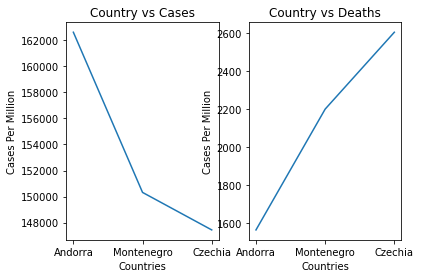

In [217]:
# Preparing two subplots to show country wise cases and deaths

plt.subplot(121)
plt.plot(country_csv,cases_csv)
plt.title("Country vs Cases")
plt.xlabel("Countries")
plt.ylabel("Cases Per Million")
plt.subplot(122)
plt.plot(country_csv,death_csv)
plt.xlabel("Countries")
plt.ylabel("Cases Per Million")
plt.title("Country vs Deaths")
plt.show()

Text(0.5, 1.0, 'Top 3 Counteries ')

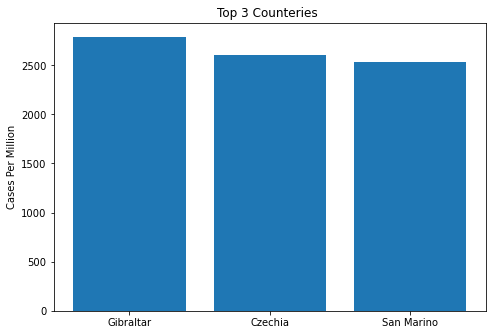

In [190]:
# Bar char of worst affected countries
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(country_csv, cases_csv)
ax.set_ylabel('Cases Per Million')
ax.set_title('Top 3 Counteries ')

Text(0.5, 1.0, 'Top 3 Counteries ')

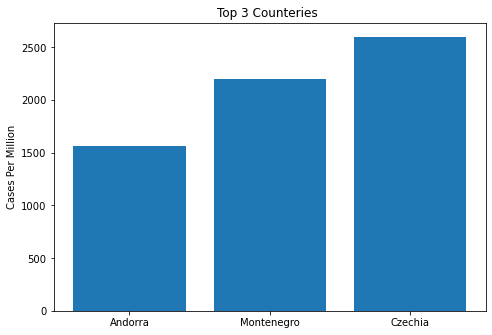

In [225]:
# Bar char of worst affected countries for death tolls
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(country_csv, death_csv)
ax.set_ylabel('Cases Per Million')
ax.set_title('Top 3 Counteries ')

In [219]:
# repeating exercise for HTML source 
conn = sql.connect('COVID.db')
c = conn.cursor()
res_html = c.execute("SELECT country,total_cases_per_1m_population ,cumulative_deaths_per_1m_population FROM COVID_HTML order by total_cases_per_1m_population desc limit 3")
country_html= []
cases_html = []
death_html = []
for row in res_html:
    print (row)
    country_html.append(row[0])
    cases_html.append(row[1])
    death_html.append(row[2])

('Andorra', 17766.13, 164.37)
('Montenegro', 15860.7, 252.05)
('Czechia', 15539.46, 281.65)


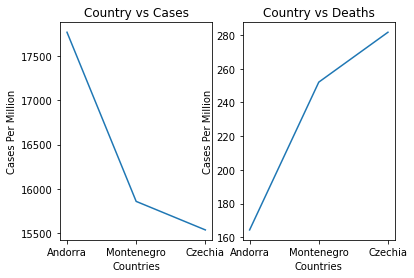

In [220]:
# repeating plot exercise for HTML source 
plt.subplot(121)
plt.plot(country_html,cases_html)
plt.title("Country vs Cases")
plt.xlabel("Countries")
plt.ylabel("Cases Per Million")
plt.subplot(122)
plt.plot(country_html,death_html)
plt.xlabel("Countries")
plt.ylabel("Cases Per Million")
plt.title("Country vs Deaths")
plt.show()

Text(0.5, 1.0, 'Top 3 Counteries ')

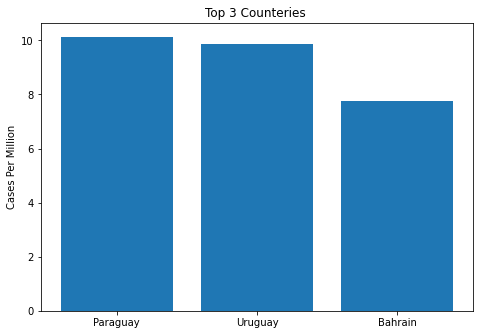

In [191]:
# repeating bar graph for HTML source
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(country_html, cases_html)
ax.set_ylabel('Cases Per Million')
ax.set_title('Top 3 Counteries ')

Text(0.5, 1.0, 'Top 3 Counteries ')

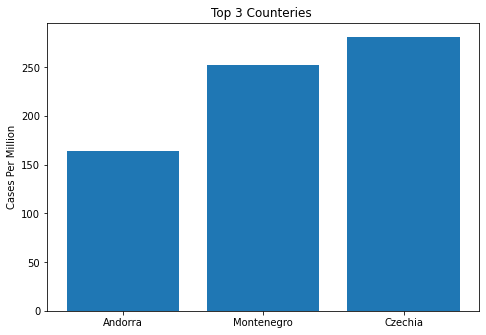

In [226]:
# repeating bar graph for HTML source
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(country_html, death_html)
ax.set_ylabel('Cases Per Million')
ax.set_title('Top 3 Counteries ')

In [221]:
# Repeating exercise for JSON source
conn = sql.connect('COVID.db')
c = conn.cursor()
res_JSON = c.execute("SELECT country,total_cases_per_million ,total_deaths_per_million FROM COVID_JSON order by total_cases_per_million desc limit 3")
country_JSON = []
cases_JSON = []
death_JSON = []
for row in res_JSON:
    print (row)
    country_JSON.append(row[0])
    cases_JSON.append(row[1])
    death_JSON.append(row[2])

('Andorra', 171901.896, 1643.694)
('Montenegro', 155428.923, 2396.26)
('Czechia', 152592.842, 2740.036)


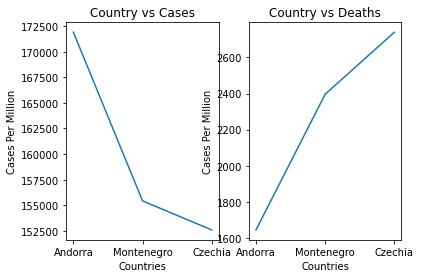

In [222]:
# Repeating Plot exercise for JSON source
plt.subplot(121)
plt.plot(country_JSON,cases_JSON)
plt.title("Country vs Cases")
plt.xlabel("Countries")
plt.ylabel("Cases Per Million")
plt.subplot(122)
plt.plot(country_JSON,death_JSON)
plt.xlabel("Countries")
plt.ylabel("Cases Per Million")
plt.title("Country vs Deaths")
plt.show()

Text(0.5, 1.0, 'Top 3 Counteries ')

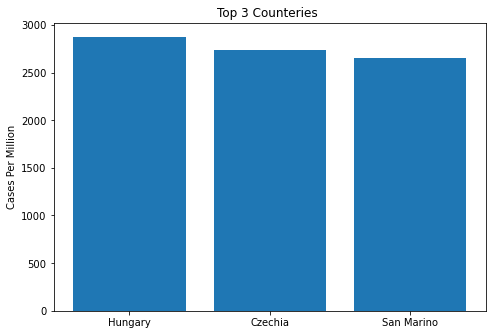

In [192]:
# Bar Chart for cases
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(country_JSON, cases_JSON)
ax.set_ylabel('Cases Per Million')
ax.set_title('Top 3 Counteries ')

Text(0.5, 1.0, 'Top 3 Counteries ')

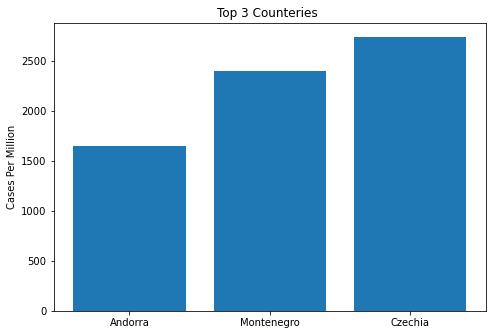

In [227]:
# Bar Chart for deaths 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(country_JSON, death_JSON)
ax.set_ylabel('Cases Per Million')
ax.set_title('Top 3 Counteries ')

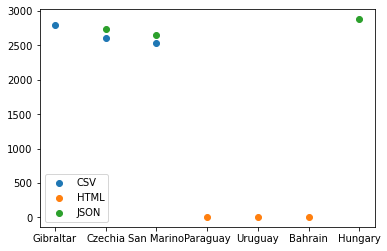

In [202]:
# combined scatterplot for all the three sources for worst affected counteries

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(country_csv, cases_csv,  label='CSV')
ax1.scatter(country_html, cases_html, label='HTML')
ax1.scatter(country_JSON, cases_JSON,label='JSON')

plt.legend(loc='best');
plt.show()


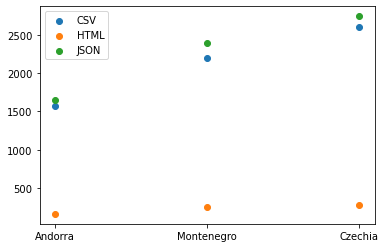

In [223]:
# combined scatterplot for all the three sources for most death tolls

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(country_csv, death_csv,  label='CSV')
ax1.scatter(country_html, death_html, label='HTML')
ax1.scatter(country_JSON, death_JSON,label='JSON')

plt.legend(loc='best');
plt.show()

## Summary

### Topic 
    This Project targets COVID 19 country wise data for covid cases and deaths.
### Data Sources :
    Project refers following 3 data sources for CSV , HTML and JSON data respectively :
    1. https://www.kaggle.com/josephassaker/covid19-global-dataset
    2. https://corona.lmao.ninja/v2/continents?yesterday=true&sort=![image.png](attachment:image.png)
    3. https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json"
    
### Clean up Process : 
    Step - 1 was getting easy and manageable column names as column name was too big and descriptive. It was hard to       manage column name with multiple words. All the columns are given appropriate captions (Used underscore "_" to 
    break the words.
    
    Step 2 - validated and fixed data for typo and other variations especially "Country" field which was common field     to link all the data sources.
    
    Step 3 : Removed unnecessary and unused fields. Though project primarily focuses on Country, Cases and death data 
    but still considering future scope of the project few additional columns remain there in the system.


### Repository : 
    SQLLite being used to store data in structural form. Since data sources are three different file formats , to 
    Identify the source , here are three separate DB tables are created to store and maintain the data. Tables are :
    1. COVID_CSV
    2. COVID_HTML
    3. COVID_JSON

### Combining Data : 

   Data is stored in three separate table but can be combined using a common field “Country". This is a Primary Key in
   all the three tables.

### Visualization  :
    matplotlib.pyplot library used to create line plot , scatterplot and Bar to Demonstrate country wise break up 
    of cases or deaths  
    
### Challenge :
   Data coming from three different sources on different dates wasn't completely in sync . All the thre sources has 
   variation in data.
   Data scrapping from HTML source in particularly was a challenging tasks due to deep nesting of 'Div' in data source.
    
### Scope of Improvement :

    There is scope of further cleaning and average out the numbers to overcome difference in values from all the 
    three sources.
    Scope of the project was limited to No of cases and Deaths for most affected top 3 counteris. This can be further enhanced for all the countries or countries from a particular region with factoring other key paramters like population of the country , economic status and healthcare facilities etc.
    
### Take Away : 
    Overall journey from basics of data frames, filtering , transforming and revisiting visualization technique was 
    very helpful in achieving hands on experience.
    Got significant exposure on python/Sqllite 